In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
data_headings = pd.read_csv('./Logs/RTI_Class_headings_Lena_33_F_0.csv')
data_positions = pd.read_csv('./Logs/RTI_Class_positions_Lena_33_F_0.csv')

In [3]:
data_headings

,time,progress,x,y,z
0,0.000000,0,0.000000,0.000000,1.000000e+00
1,0.201664,0,0.000000,0.000000,1.000000e+00
2,0.401664,0,0.000000,0.000000,1.000000e+00
3,0.592425,0,0.000000,0.000000,1.000000e+00
4,0.801663,0,0.000000,0.000000,1.000000e+00
...,...,...,...,...,...
700,139.999500,1,0.000000,1.000000,1.490116e-08
701,140.196700,1,-0.143246,0.989652,8.413345e-03
702,140.397300,1,-0.203637,0.978148,-4.194382e-02
703,140.589600,1,-0.259426,0.963630,-6.414670e-02


In [4]:
data_positions

,time,progress,x,y,z
0,0.000000,0,0.000000,0.000000,0.000000
1,0.201664,0,0.000000,0.000000,0.000000
2,0.401664,0,0.000000,0.000000,0.000000
3,0.592425,0,0.000000,0.000000,0.000000
4,0.801663,0,0.000000,0.000000,0.000000
...,...,...,...,...,...
700,139.999500,1,1.031835,0.580005,7.060928
701,140.196700,1,1.031835,0.580005,7.060928
702,140.397300,1,1.031835,0.580005,7.060928
703,140.589600,1,1.031835,0.580005,7.060928


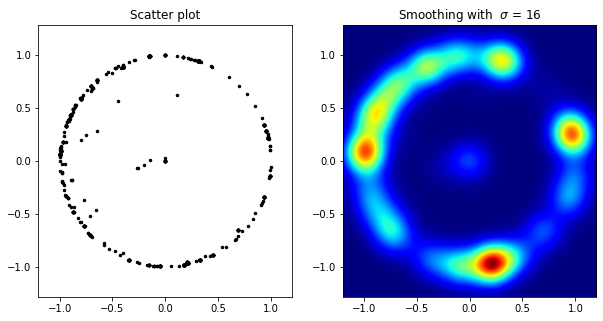

In [5]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

def heading_heatmap(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    margin = 0
    extent = [xedges[0] - margin, xedges[-1] + margin, yedges[0] - margin, yedges[-1] + margin]
    return heatmap.T, extent

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
#sigmas = [0, 16, 32, 64]
sigmas = [0, 16]

x = list(data_headings.x)
x.append(-1.5)
x.append(1.5)

z = list(data_headings.z)
z.append(-1.5)
z.append(1.5)

for ax, s in zip(axs.flatten(), sigmas):
    
    ax.axis('equal')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    
    if s == 0:
        ax.plot(x, z, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = heading_heatmap(x, z, 40)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

        plt.show()
           

In [6]:
from matplotlib import image
from matplotlib import pyplot

image = image.imread('plan.png')
print(image.shape)

(1000, 1000, 4)


In [7]:
split_idx = data_positions[data_positions.progress == 0].index[-1] + 3

In [8]:
def position_plot(a, b, c, d):
    
    plt.figure(figsize=(10, 10))
    plt.axis('equal')
    plt.xlim(0, 1000)
    plt.ylim(0, 1000)

    delta_x = a
    delta_z = b
    c_x = -c
    c_z = -d

    plt.imshow(image[:, ::-1])
    
    plt.plot(c_x*data_positions.x[:split_idx] + delta_x,
             c_z*data_positions.z[:split_idx] + delta_z,
             linewidth=3, color="turquoise")
    
    plt.plot(c_x*data_positions.x[split_idx-1:] + delta_x,
             c_z*data_positions.z[split_idx-1:] + delta_z,
             linewidth=3, color="orange")
    
    error = np.sqrt(np.power(data_positions.x.iloc[-1] - data_positions.x.iloc[0], 2) + \
            np.power(data_positions.z.iloc[-1] - data_positions.z.iloc[0], 2))
    
    print('Error:', round(error, 2), 'GU')

In [9]:
c_x = image.shape[0]/(data_positions.x.max() - data_positions.x.min()) - 0.4
c_z = image.shape[1]/(data_positions.z.max() - data_positions.z.min()) - 1.4
interact(position_plot, a=430, b=780, c=c_x, d=c_z)

interactive(children=(IntSlider(value=430, description='a', max=1290, min=-430), IntSlider(value=780, descript…

<function __main__.position_plot(a, b, c, d)>

In [10]:
data_positions[data_positions.progress == 1]

,time,progress,x,y,z
558,111.5883,1,-4.167491,0.580005,220.135800
559,111.7987,1,-4.167491,0.580005,220.135800
560,111.9899,1,-4.167491,0.580005,220.135800
561,112.1987,1,-4.167491,0.580005,220.135800
562,112.3839,1,-4.167491,0.580005,220.135800
...,...,...,...,...,...
700,139.9995,1,1.031835,0.580005,7.060928
701,140.1967,1,1.031835,0.580005,7.060928
702,140.3973,1,1.031835,0.580005,7.060928
703,140.5896,1,1.031835,0.580005,7.060928


In [11]:
data_positions.x.iloc[-1]

1.031835

In [12]:
data_positions.z.iloc[-1]

7.060928